In [37]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import random

In [2]:
def read_bids_comparison(folder):
    with open(os.path.join(folder, 'bids_comparison.json'), 'r') as fin:
        return json.load(fin)

In [3]:
def plot_bar(x, y, text_x, text_y, title, fontsize_x=None, rotation_x=None):
    index = np.arange(len(x))
    plt.bar(index, y)
    plt.xlabel(text_x) #, fontsize=5)
    plt.ylabel(text_y) #, fontsize=5)
    plt.xticks(index, x, fontsize=fontsize_x, rotation=rotation_x)#, fontsize=5, rotation=30)
    plt.title(title)
    plt.show()
    plt.savefig('figure.png', dpi=100)    

In [108]:
def plot_bar_double(x, y1, y2, text_x, text_y, title, 
                    fontsize_x=None, rotation_x=None, filename=None, label1='var1', label2='var2'):
    # set width of bar
    barWidth = 0.35

    # set height of bar
    bars1 = y1
    bars2 = y2

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, width=barWidth, color='#2b38b3', edgecolor='white', label=label1)
    plt.bar(r2, bars2, width=barWidth, color='#33a6a0', edgecolor='white', label=label2)

    # Add xticks on the middle of the group bars
    plt.xlabel(text_x, fontsize=fontsize_x)
    plt.ylabel(text_y, fontsize=fontsize_x)
    plt.xticks([r + barWidth for r in range(len(bars1))], x, fontsize=fontsize_x-5)

    # size of plot
    
    fig_size = plt.rcParams["figure.figsize"]
 
    print("Current size:", fig_size)

    # Set figure width to 12 and height to 9
    fig_size[0] = 16
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

    # Create legend & Show graphic
    plt.legend()
    plt.show()

In [5]:
def get_wins_per_transporter(bids_comparison):
    icnet = {}
    aicnet = {}
    for bid in bids_comparison:
        t_icnet = bid['transporter']['icnet']
        if t_icnet not in icnet:
            icnet[t_icnet] = 0
        
        t_aicnet = bid['transporter']['aicnet']
        if t_aicnet not in aicnet:
            aicnet[t_aicnet] = 0
        
        icnet[t_icnet] +=1
        aicnet[t_aicnet] +=1
    
    return icnet, aicnet
        

In [6]:
def order_two_lists(list1, list2):
    return (list(t) for t in zip(*sorted(zip(list1, list2))))

def order_three_lists(list1, list2, list3):
    return (list(t) for t in zip(*sorted(zip(list1, list2, list3))))

In [104]:
def show_total_wins_per_transpoter(folder):
    bids_comparison = read_bids_comparison(folder)
    icnet_wpt, aicnet_wpt = get_wins_per_transporter(bids_comparison)
    
    # ICNET
#     plot_bar(
#         [x for x in icnet_wpt],
#         [icnet_wpt[x] for x in icnet_wpt],
#         'Transporter', 'Wins', 'Transpoter / Number of wins',
#         fontsize_x = 10
#     )
    
    # AICNET
#     plot_bar(
#         [x for x in aicnet_wpt],
#         [aicnet_wpt[x] for x in aicnet_wpt],
#         'Transporter', 'Wins', 'Transpoter / Number of wins',
#         fontsize_x = 10
#     )
    
    values_x = [int(x) for x in aicnet_wpt]
    values_y_icnet = [icnet_wpt[x]/1000 for x in icnet_wpt]
    values_y_aicnet = [aicnet_wpt[x]/1000 for x in aicnet_wpt]
    values_x, values_y_icnet, values_y_aicnet = order_three_lists(values_x, values_y_icnet, values_y_aicnet)
    
    # BOTH
    plot_bar_double(
        values_x,
        values_y_icnet,
        values_y_aicnet,
        'Transporter', 'Wins', 'Transpoter / Number of wins',
        fontsize_x = 15,
        filename='icnet-vs-aicnet.png',
        label1='ICNET',
        label2='AICNET'
    )

Current size: [16.0, 12.0]


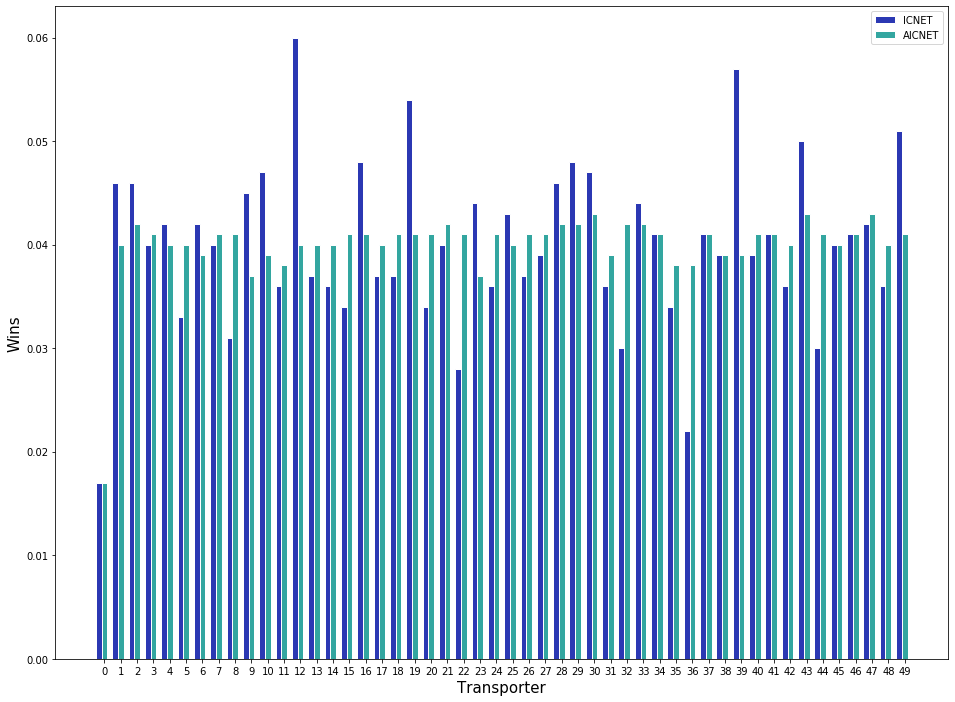

In [109]:
show_total_wins_per_transpoter('simulations_50_transpoters/1000_LOW_PRICE_LENIENT_50_500_12_90_10_pagerank_False')

In [9]:
def plot_timeseries():
    plt.plot([1,2,3,4])
    plt.ylabel('some numbers')
    plt.show()

In [96]:
def get_profit_per_transporter(bids_comparison):
    icnet = {}
    aicnet = {}
    count_icnet = {}
    count_aicnet = {}
    for bid in bids_comparison:
        t_icnet = bid['transporter']['icnet']
        if t_icnet not in icnet:
            icnet[t_icnet] = 0
            count_icnet[t_icnet] = 0
        
        t_aicnet = bid['transporter']['aicnet']
        if t_aicnet not in aicnet:
            aicnet[t_aicnet] = 0
            count_aicnet[t_aicnet] = 0
        
        icnet[t_icnet] += float(bid['winning_price']['icnet']) - float(bid['estimated_price']['icnet'])
        count_icnet[t_icnet] +=1
        aicnet[t_aicnet] += float(bid['winning_price']['aicnet']) - float(bid['estimated_price']['aicnet'])
        count_aicnet[t_aicnet] +=1
        
    for t in icnet:
        icnet[t] = float(icnet[t]) / float(count_icnet[t])
    for t in aicnet:
        aicnet[t] = float(aicnet[t]) / float(count_aicnet[t])
        
    return icnet, aicnet

In [11]:
def get_broker_earnings(bids_comparison):
    icnet = []
    aicnet = []
    for bid in bids_comparison:
        icnet.append(float(bid['winning_price']['icnet']) - float(bid['estimated_price']['icnet']))
        aicnet.append(float(bid['winning_price']['aicnet']) - float(bid['estimated_price']['aicnet']))
    
    return icnet, aicnet

In [56]:
def plot_double_line_chart(x, y1, y2, label1=None, label2=None):
    # Plot the data
    x = x[len(x)//2:]
    y1= y1[len(y1)//2:]
    y2= y2[len(y2)//2:]
    plt.show()
    plt.plot(x, y1, label=label1)
    plt.plot(x, y2, label=label2)

    fig_size = plt.rcParams["figure.figsize"]
 
    print("Current size:", fig_size)

    # Set figure width to 12 and height to 9
    fig_size[0] = 16
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size
    
    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

In [92]:
def show_total_profits_per_transpoter(folder):
    bids_comparison = read_bids_comparison(folder)
    profits_icnet, profits_aicnet = get_broker_earnings(bids_comparison)

    print(len(profits_icnet))
    profits_over_time_icnet = [0]
    current_profit = 0
    for profit in profits_icnet:
        current_profit+=profit
        profits_over_time_icnet.append(current_profit)
        
    profits_over_time_aicnet = [0]
    current_profit = 0
    for profit in profits_aicnet:
        current_profit+=profit
        profits_over_time_aicnet.append(current_profit)
    
    bids = range(0, len(profits_icnet)+1)
    plot_double_line_chart(
        bids,
        profits_over_time_icnet,
        profits_over_time_aicnet,
        label1='ICNET',
        label2='AICNET'
    )
#     # ICNET
#     plot_bar(
#         [x for x in icnet_ppt],
#         [icnet_ppt[x] for x in icnet_ppt],
#         'Transporter', 'Profit', 'Transpoter / Profits',
#         fontsize_x = 5
#     )
    
#     # AICNET
#     plot_bar(
#         [x for x in aicnet_ppt],
#         [aicnet_ppt[x] for x in aicnet_ppt],
#         'Transporter', 'Profit', 'Transpoter / Profits',
#         fontsize_x = 5
#     )
    

2000
Current size: [16.0, 12.0]


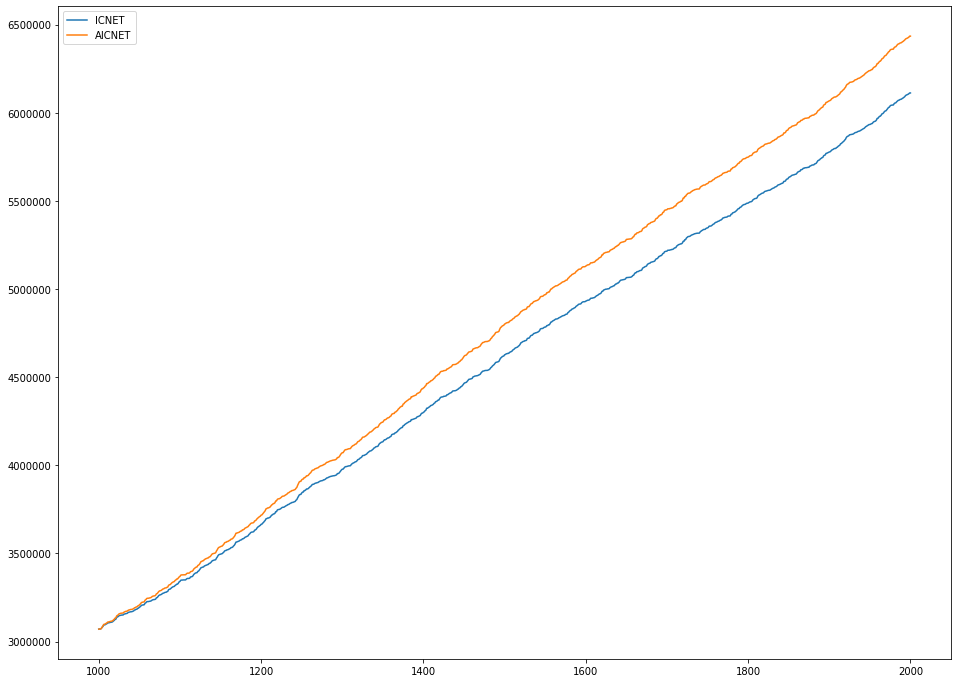

In [93]:
show_total_profits_per_transpoter('simulations_50_transpoters/1000_LOW_PRICE_LENIENT_50_500_12_90_10_pagerank_False')

In [97]:
def show_earnings_per_transporter(folder):
    bids_comparison = read_bids_comparison(folder)
    bids_comparison = bids_comparison[len(bids_comparison)//2:]
    icnet_wpt, aicnet_wpt = get_profit_per_transporter(bids_comparison)
    
    # ICNET
#     plot_bar(
#         [x for x in icnet_wpt],
#         [icnet_wpt[x] for x in icnet_wpt],
#         'Transporter', 'Wins', 'Transpoter / Number of wins',
#         fontsize_x = 10
#     )
    
    # AICNET
#     plot_bar(
#         [x for x in aicnet_wpt],
#         [aicnet_wpt[x] for x in aicnet_wpt],
#         'Transporter', 'Wins', 'Transpoter / Number of wins',
#         fontsize_x = 10
#     )
    
    values_x = [int(x) for x in aicnet_wpt]
    values_y_icnet = [icnet_wpt[x] for x in icnet_wpt]
    values_y_aicnet = [aicnet_wpt[x] for x in aicnet_wpt]
    values_x, values_y_icnet, values_y_aicnet = order_three_lists(values_x, values_y_icnet, values_y_aicnet)
    
    # BOTH
    plot_bar_double(
        values_x,
        values_y_icnet,
        values_y_aicnet,
        'Transporter', 'Profits', 'Transpoter / Number of wins',
        fontsize_x = 15,
        filename='icnet-vs-aicnet.png',
        label1='ICNET',
        label2='AICNET'
    )

Current size: [16.0, 12.0]


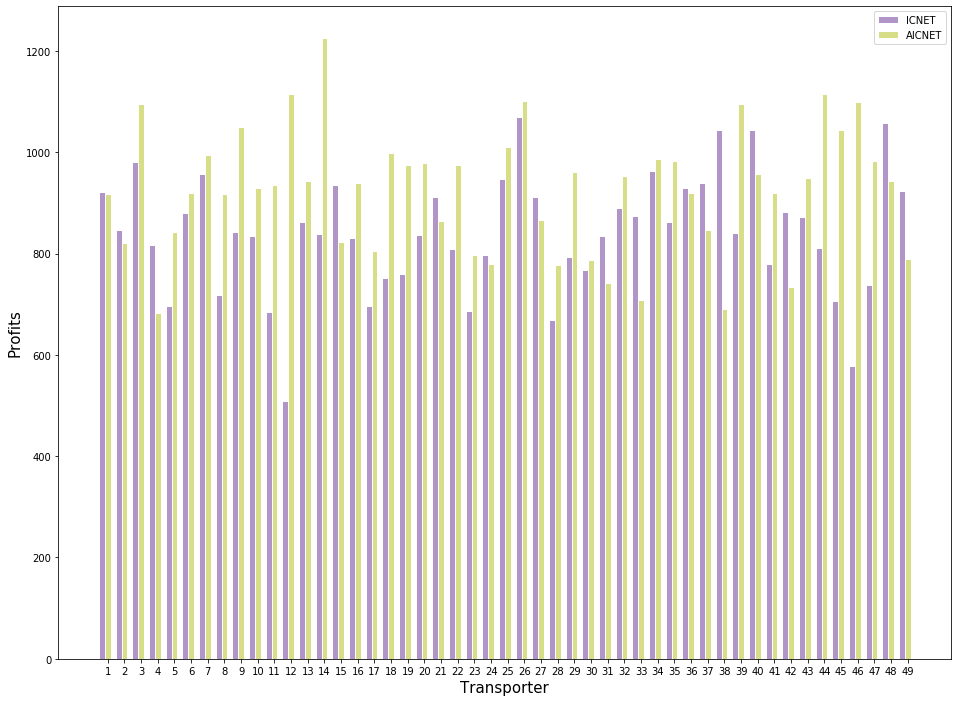

In [103]:
show_earnings_per_transporter('simulations_50_transpoters/1000_HIGH_PRICE_CONSERVATIVE_50_500_12_10_10_pagerank_False')